# Работа 1.2

## Исследование эффекта Комптона

In [46]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

In [76]:
def line(x, a, b):
    return a * x + b

In [98]:
data = pd.read_csv('data/res.csv', sep = '\t')
det = 0
E = 662 * 10**6
angle = np.array(data[data.Other==det].Angle)
canal = np.array(data[data.Other==det].Canal)

1.0957973955499158e-08 1.0713746585265195e-08


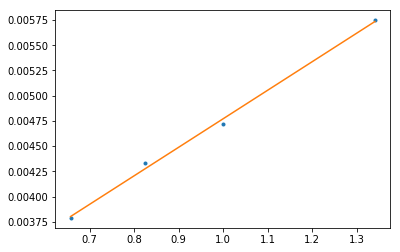

In [99]:
res = curve_fit(f=line, xdata=(1 - np.cos(angle * 3.14 / 180)), ydata=(1/canal))
popt, pcov = res
a, b = popt
a_s = pcov[0][0]
b_s = pcov[1][1]
print(a_s, a_b)

plt.plot(1 - np.cos(angle * 3.14 / 180), 1/canal, ".")
plt.plot(1 - np.cos(angle* 3.14 / 180), line(1 - np.cos(angle * 3.14 / 180), a, b))

In [100]:
N_0 = 1/line(0, a, b)
N_90 = 1/line(1, a, b)
print(N_0)
print(N_90)
print(662 * N_90 / (N_0 - N_90))

514.683373122558
209.6394992334862
454.9553699381461


In [101]:
n0s = b_s
n90s = (a_s**2 + b_s**2)*0.5
Es = E*(N_90**2*n0s**2 + ((2 * N_0 - N_90) / (N_0 - N_90))**2 * n90s**2)**0.5/(N_0 - N_90)
print(Es)

4.874276541122876
